# Introduction
- In today's thriving e-commerce landscape, understanding and enhancing the customer experience are essential for business success; an international e-commerce company specializing in electronic products is embarking on a data-driven journey to revolutionize its operations, leveraging advanced machine learning techniques to dissect customer interactions and product shipments, aiming to boost satisfaction and efficiency with a foundation of a robust dataset of 10,999 observations across 12 variables providing insights into the entire customer journey from purchase to delivery. 
This project aims to equip the enterprise with insights to surpass customer expectations and improve operational efficiency through data-driven strategies. E-commerce research emphasizes the importance of data-driven approaches in customer segmentation, recommendation systems, and supply chain management. Existing literature and works on similar datasets  highlight the transformative potential of machine learning in extracting insights from e-commerce datasets. The importance of delivering the goods on time by customer reviews and trying to predict ways to deliver data in faster ways. The goals of the project include identifying patterns in the customer journey, segmenting customers for targeted strategies, optimizing supply chain operations, and enhancing overall customer satisfaction. This project seeks to empower the enterprise with analytical tools for navigating the e-commerce landscape and fostering customer-centric growth.
  ## Metadata
  
- ID: A unique identifier for each customer, ensuring precise tracking and personalized insights. 
- Warehouse Block: With the company's expansive warehouse segmented into blocks A through E, this variable helps in logistics optimization and inventory management. 
- Mode of Shipment: Understanding the impact of different shipment methods (Ship, Flight, Road) on customer satisfaction and delivery efficiency.
- Customer Care Calls: The frequency of customer inquiries serves as an indicator of service quality and customer engagement. 
- Customer Rating: A direct measure of customer satisfaction, with ratings ranging from 1 (lowest) to 5 (highest). 
- Cost of the Product: This financial metric is crucial for pricing strategies and profitability analysis. 
- Prior Purchases: Tracking customers' purchase history aids in predicting future buying behavior and personalizing marketing efforts. 
- Product Importance: Categorizing products based on their importance (low, medium, high) enables tailored handling and prioritization. 
- Gender: Analyzing shopping patterns and preferences across genders. 
- Discount Offered: Examining the impact of discounts on sales volume and customer acquisition. 
- Weight in Grams: The logistical aspect of shipping, influencing costs and delivery methods. 
- Reached on Time: The critical outcome variable indicating whether a product was delivered within the expected timeframe, serving as a benchmark for operational efficiency. 0 indicates it reached on time and 1 indicates that its not reached on time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Train new.csv')
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data=data.drop(columns=['ID'])

In [5]:
data=data.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'})

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

In [8]:
categorical_data=data.select_dtypes(include=["object"])
numerical_data=data.select_dtypes(include=["int","float"])

Text(0.5, 1.0, 'Reached on time')

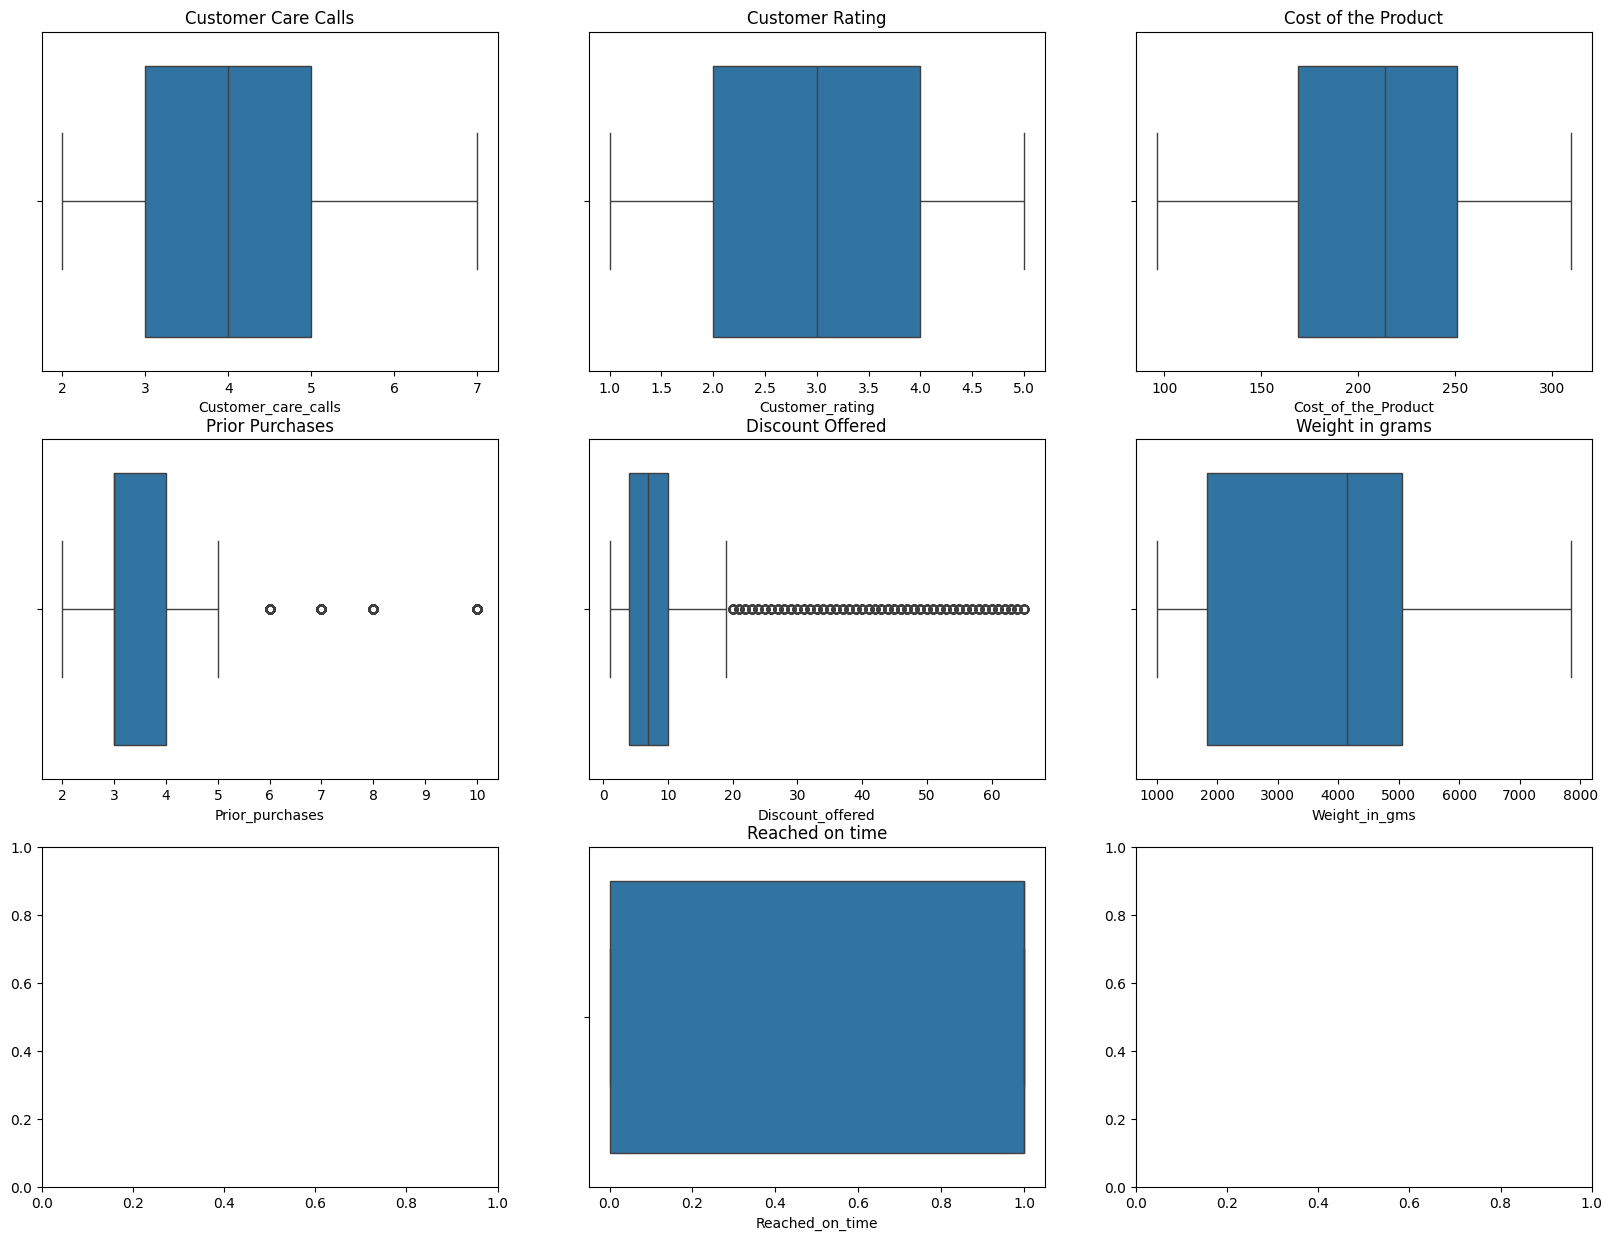

In [9]:
fig, axes=plt.subplots(3,3,figsize=(20,15))
sns.boxplot(data=data,x='Customer_care_calls',ax=axes[0][0])
sns.boxplot(data=data,x='Customer_rating',ax=axes[0][1])
sns.boxplot(data=data,x='Cost_of_the_Product',ax=axes[0][2])
sns.boxplot(data=data,x='Prior_purchases',ax=axes[1][0])
sns.boxplot(data=data,x='Discount_offered',ax=axes[1][1])
sns.boxplot(data=data,x='Weight_in_gms',ax=axes[1][2])
sns.boxplot(data=data,x='Reached_on_time',ax=axes[2][1])

axes[0][0].set_title('Customer Care Calls')
axes[0][1].set_title('Customer Rating')
axes[0][2].set_title('Cost of the Product')
axes[1][0].set_title('Prior Purchases')
axes[1][1].set_title('Discount Offered')
axes[1][2].set_title('Weight in grams')
axes[2][1].set_title('Reached on time')

Text(0.5, 1.0, 'Product Importance Distribution')

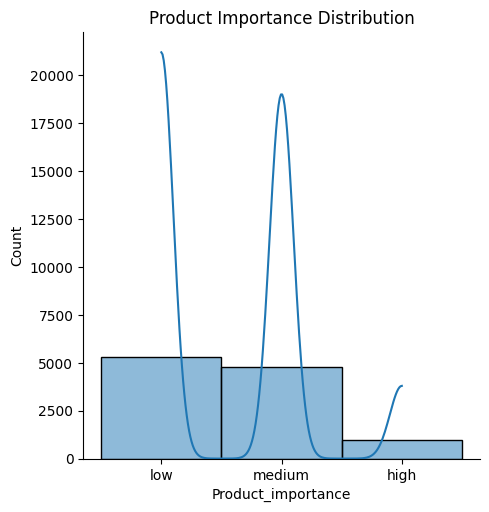

In [10]:
sns.displot(data=data,x='Product_importance',kind='hist',kde=True)
plt.title('Product Importance Distribution')

Text(0.5, 1.0, 'Gender')

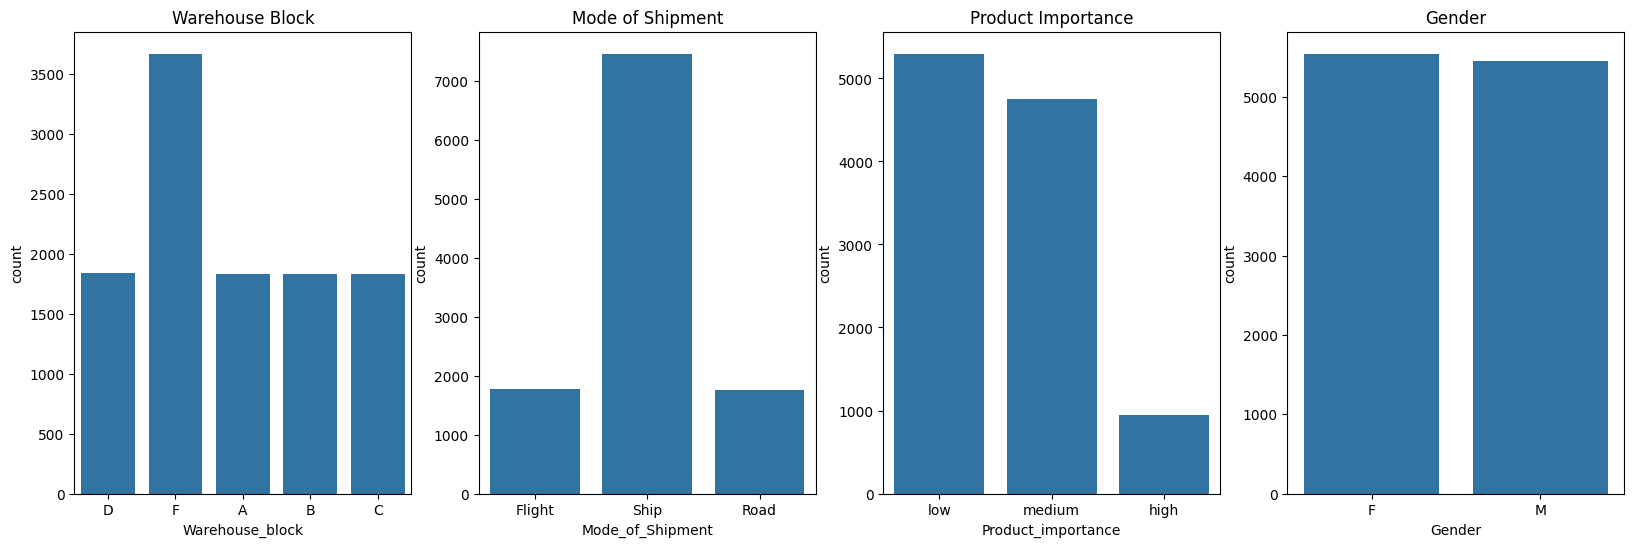

In [11]:
fig, axes =plt.subplots(1,4,figsize=(20,6))
sns.countplot(data=data,x='Warehouse_block',ax=axes[0])
sns.countplot(data=data,x='Mode_of_Shipment',ax=axes[1])
sns.countplot(data=data,x='Product_importance',ax=axes[2])
sns.countplot(data=data,x='Gender',ax=axes[3])

axes[0].set_title('Warehouse Block')
axes[1].set_title('Mode of Shipment')
axes[2].set_title('Product Importance')
axes[3].set_title('Gender')

In [12]:
categorical_data.mode()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,F,Ship,low,F


Text(0.5, 1.0, 'Discount Scatterplot')

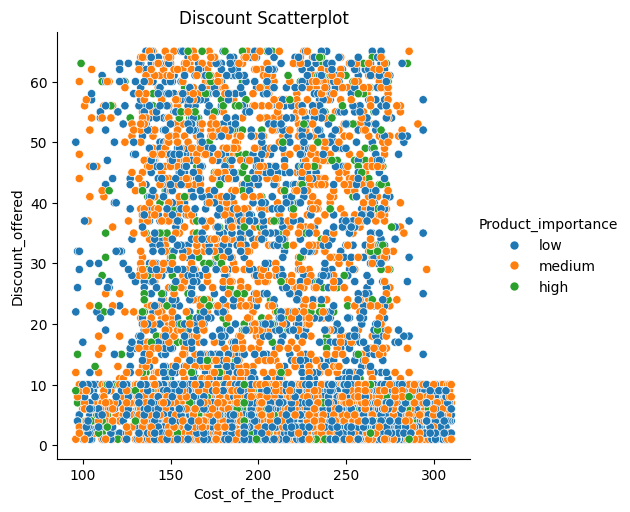

In [13]:
sns.relplot(data=data,x='Cost_of_the_Product',y='Discount_offered',hue='Product_importance',kind="scatter")
plt.title('Discount Scatterplot')

Text(0.5, 1.0, 'Customer Rating Scatterplot')

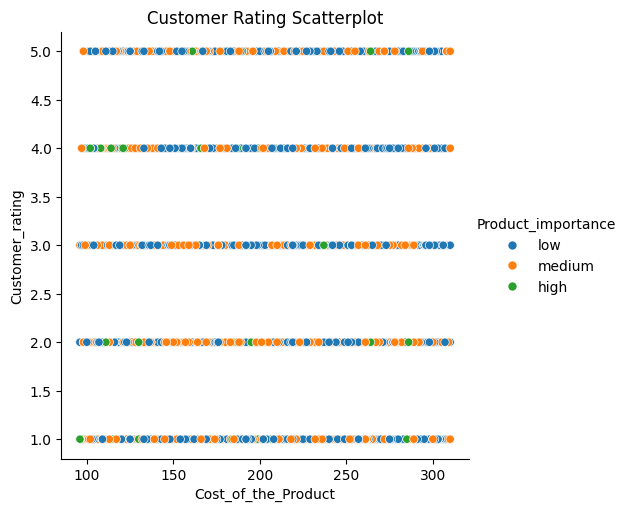

In [14]:
sns.relplot(data=data,x='Cost_of_the_Product',y='Customer_rating',hue='Product_importance',kind="scatter")
plt.title('Customer Rating Scatterplot')

Text(0.5, 1.0, 'Correlation Matrix of Dataset')

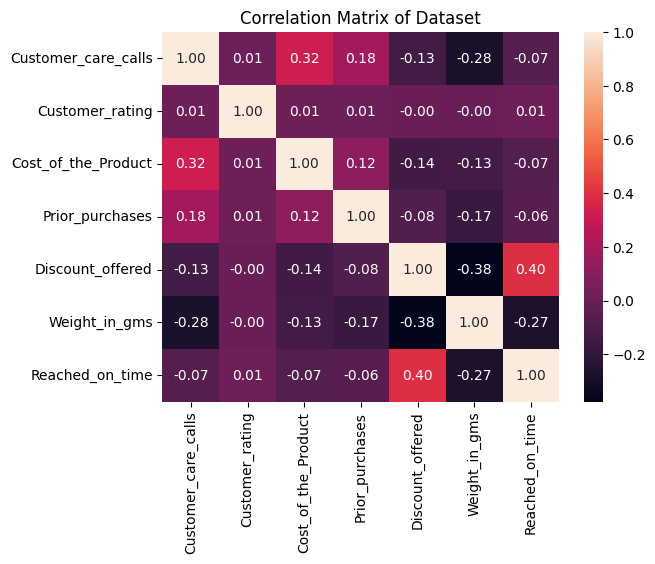

In [15]:
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Dataset')

# One Hot Encoding and Label Encoding for Categorical Variables

In [16]:
data=pd.concat([data,pd.get_dummies(data['Gender'],dtype=int)],axis=1)
data = data.rename(columns={'F': 'Female', 'M': 'Male'})
data=data.drop(columns=['Gender'])
data=pd.concat([data,pd.get_dummies(data['Warehouse_block'],dtype=int)],axis=1)
data=data.drop(columns=['Warehouse_block'])
data=pd.concat([data,pd.get_dummies(data['Mode_of_Shipment'],dtype=int)],axis=1)
data=data.drop(columns=['Mode_of_Shipment'])
data


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,Female,Male,A,B,C,D,F,Flight,Road,Ship
0,4,2,177,3,low,44,1233,1,1,0,0,0,0,1,0,1,0,0
1,4,5,216,2,low,59,3088,1,0,1,0,0,0,0,1,1,0,0
2,2,2,183,4,low,48,3374,1,0,1,1,0,0,0,0,1,0,0
3,3,3,176,4,medium,10,1177,1,0,1,0,1,0,0,0,1,0,0
4,2,2,184,3,medium,46,2484,1,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,medium,1,1538,1,1,0,1,0,0,0,0,0,0,1
10995,4,1,232,5,medium,6,1247,0,1,0,0,1,0,0,0,0,0,1
10996,5,4,242,5,low,4,1155,0,1,0,0,0,1,0,0,0,0,1
10997,5,2,223,6,medium,2,1210,0,0,1,0,0,0,0,1,0,0,1


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
class_order = ['low', 'medium', 'high']
le.classes_ = class_order
le.fit(class_order)
prior_purchases_encoded = le.transform(data['Product_importance'])
data['Product_importance'] = prior_purchases_encoded

In [18]:
data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,Female,Male,A,B,C,D,F,Flight,Road,Ship
0,4,2,177,3,1,44,1233,1,1,0,0,0,0,1,0,1,0,0
1,4,5,216,2,1,59,3088,1,0,1,0,0,0,0,1,1,0,0
2,2,2,183,4,1,48,3374,1,0,1,1,0,0,0,0,1,0,0
3,3,3,176,4,2,10,1177,1,0,1,0,1,0,0,0,1,0,0
4,2,2,184,3,2,46,2484,1,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,2,1,1538,1,1,0,1,0,0,0,0,0,0,1
10995,4,1,232,5,2,6,1247,0,1,0,0,1,0,0,0,0,0,1
10996,5,4,242,5,1,4,1155,0,1,0,0,0,1,0,0,0,0,1
10997,5,2,223,6,2,2,1210,0,0,1,0,0,0,0,1,0,0,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer_care_calls  10999 non-null  int64
 1   Customer_rating      10999 non-null  int64
 2   Cost_of_the_Product  10999 non-null  int64
 3   Prior_purchases      10999 non-null  int64
 4   Product_importance   10999 non-null  int32
 5   Discount_offered     10999 non-null  int64
 6   Weight_in_gms        10999 non-null  int64
 7   Reached_on_time      10999 non-null  int64
 8   Female               10999 non-null  int32
 9   Male                 10999 non-null  int32
 10  A                    10999 non-null  int32
 11  B                    10999 non-null  int32
 12  C                    10999 non-null  int32
 13  D                    10999 non-null  int32
 14  F                    10999 non-null  int32
 15  Flight               10999 non-null  int32
 16  Road                 1

# Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

data['Cost_of_the_Product_normalized'] = min_max_scaler.fit_transform(data[['Cost_of_the_Product']])
data['Weight_in_gms_normalized'] = min_max_scaler.fit_transform(data[['Weight_in_gms']])

# Standardization

In [22]:
data['Cost_of_the_Product_standardized'] = standard_scaler.fit_transform(data[['Cost_of_the_Product']])
data['Weight_in_gms_standardized'] = standard_scaler.fit_transform(data[['Weight_in_gms']])

In [23]:
data[['Cost_of_the_Product', 'Cost_of_the_Product_normalized', 'Cost_of_the_Product_standardized',
      'Weight_in_gms', 'Weight_in_gms_normalized', 'Weight_in_gms_standardized']].head()

,Cost_of_the_Product,Cost_of_the_Product_normalized,Cost_of_the_Product_standardized,Weight_in_gms,Weight_in_gms_normalized,Weight_in_gms_standardized
0,177,0.378505,-0.690722,1233,0.033893,-1.468240
1,216,0.560748,0.120746,3088,0.304894,-0.333893
2,183,0.406542,-0.565881,3374,0.346676,-0.159002
3,176,0.373832,-0.711529,1177,0.025712,-1.502484
4,184,0.411215,-0.545074,2484,0.216654,-0.703244


In [24]:
def outlierDetector(Column):
    Q1 = data[Column].quantile(0.25)
    Q3 = data[Column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[Column] < lower_bound) | (data[Column] > upper_bound)]
    return outliers


In [25]:
outlierDetector('Discount_offered')

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,Female,Male,...,C,D,F,Flight,Road,Ship,Cost_of_the_Product_normalized,Weight_in_gms_normalized,Cost_of_the_Product_standardized,Weight_in_gms_standardized
0,4,2,177,3,1,44,1233,1,1,0,...,0,1,0,1,0,0,0.378505,0.033893,-0.690722,-1.468240
1,4,5,216,2,1,59,3088,1,0,1,...,0,0,1,1,0,0,0.560748,0.304894,0.120746,-0.333893
2,2,2,183,4,1,48,3374,1,0,1,...,0,0,0,1,0,0,0.406542,0.346676,-0.565881,-0.159002
4,2,2,184,3,2,46,2484,1,1,0,...,1,0,0,1,0,0,0.411215,0.216654,-0.545074,-0.703244
7,4,1,233,2,1,48,2804,1,1,0,...,0,0,1,1,0,0,0.640187,0.263404,0.474462,-0.507561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,3,1,169,3,0,24,1740,1,0,1,...,0,0,0,0,1,0,0.341121,0.107962,-0.857177,-1.158205
3130,6,5,246,4,2,50,3618,1,0,1,...,1,0,0,0,1,0,0.700935,0.382323,0.744951,-0.009794
3131,4,1,232,3,2,55,2686,1,0,1,...,0,0,1,0,1,0,0.635514,0.246165,0.453655,-0.579719
3132,3,5,251,3,1,21,2476,1,1,0,...,0,1,0,0,1,0,0.724299,0.215486,0.848985,-0.708136


In [26]:
outlierDetector('Prior_purchases')

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,Female,Male,...,C,D,F,Flight,Road,Ship,Cost_of_the_Product_normalized,Weight_in_gms_normalized,Cost_of_the_Product_standardized,Weight_in_gms_standardized
37,2,4,181,6,2,16,3605,1,1,0,...,0,0,1,0,0,1,0.397196,0.380424,-0.607494,-0.017744
62,5,1,105,6,2,62,1292,1,0,1,...,0,0,0,0,0,1,0.042056,0.042513,-2.188815,-1.432161
74,6,1,238,6,1,13,2442,1,1,0,...,0,0,0,0,0,1,0.663551,0.210519,0.578496,-0.728927
90,5,3,174,6,0,41,1085,1,1,0,...,0,1,0,0,0,1,0.364486,0.012272,-0.753142,-1.558743
133,5,4,280,6,2,51,3582,1,1,0,...,0,0,1,1,0,0,0.859813,0.377064,1.452384,-0.031809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10981,5,2,251,6,1,10,1196,0,0,1,...,0,0,1,0,0,1,0.724299,0.028488,0.848985,-1.490866
10983,4,3,229,6,2,1,1235,1,0,1,...,0,0,0,0,0,1,0.621495,0.034186,0.391235,-1.467017
10990,5,4,219,6,1,3,1098,0,0,1,...,1,0,0,0,0,1,0.574766,0.014171,0.183166,-1.550793
10993,5,1,257,6,1,1,1150,0,1,0,...,0,0,1,0,0,1,0.752336,0.021768,0.973827,-1.518995


# PCA

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [28]:
data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,Female,Male,...,C,D,F,Flight,Road,Ship,Cost_of_the_Product_normalized,Weight_in_gms_normalized,Cost_of_the_Product_standardized,Weight_in_gms_standardized
0,4,2,177,3,1,44,1233,1,1,0,...,0,1,0,1,0,0,0.378505,0.033893,-0.690722,-1.468240
1,4,5,216,2,1,59,3088,1,0,1,...,0,0,1,1,0,0,0.560748,0.304894,0.120746,-0.333893
2,2,2,183,4,1,48,3374,1,0,1,...,0,0,0,1,0,0,0.406542,0.346676,-0.565881,-0.159002
3,3,3,176,4,2,10,1177,1,0,1,...,0,0,0,1,0,0,0.373832,0.025712,-0.711529,-1.502484
4,2,2,184,3,2,46,2484,1,1,0,...,1,0,0,1,0,0,0.411215,0.216654,-0.545074,-0.703244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,2,1,1538,1,1,0,...,0,0,0,0,0,1,0.728972,0.078451,0.869792,-1.281730
10995,4,1,232,5,2,6,1247,0,1,0,...,0,0,0,0,0,1,0.635514,0.035939,0.453655,-1.459679
10996,5,4,242,5,1,4,1155,0,1,0,...,1,0,0,0,0,1,0.682243,0.022498,0.661724,-1.515937
10997,5,2,223,6,2,2,1210,0,0,1,...,0,0,1,0,0,1,0.593458,0.030533,0.266394,-1.482304


In [29]:
X = data.drop(columns=['Reached_on_time','Cost_of_the_Product_normalized','Weight_in_gms_normalized','Cost_of_the_Product_standardized','Weight_in_gms_standardized'])
y = data['Reached_on_time']

X_scaled=standard_scaler.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Female,Male,A,B,C,D,F,Flight,Road,Ship
0,-0.047711,-0.700755,-0.690722,-0.372735,-0.548034,1.889983,-1.468240,0.991760,-0.991760,-0.447189,-0.447189,-0.447189,2.235458,-0.707059,2.278079,-0.436459,-1.452480
1,-0.047711,1.421578,0.120746,-1.029424,-0.548034,2.815636,-0.333893,-1.008308,1.008308,-0.447189,-0.447189,-0.447189,-0.447336,1.414310,2.278079,-0.436459,-1.452480
2,-1.799887,-0.700755,-0.565881,0.283954,-0.548034,2.136824,-0.159002,-1.008308,1.008308,2.236190,-0.447189,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.452480
3,-0.923799,0.006689,-0.711529,0.283954,1.035735,-0.208162,-1.502484,-1.008308,1.008308,-0.447189,2.236190,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.452480
4,-1.799887,-0.700755,-0.545074,-0.372735,1.035735,2.013404,-0.703244,0.991760,-0.991760,-0.447189,-0.447189,2.236190,-0.447336,-0.707059,2.278079,-0.436459,-1.452480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,-0.047711,-1.408199,0.869792,0.940643,1.035735,-0.763553,-1.281730,0.991760,-0.991760,2.236190,-0.447189,-0.447189,-0.447336,-0.707059,-0.438966,-0.436459,0.688478
10995,-0.047711,-1.408199,0.453655,0.940643,1.035735,-0.455002,-1.459679,0.991760,-0.991760,-0.447189,2.236190,-0.447189,-0.447336,-0.707059,-0.438966,-0.436459,0.688478
10996,0.828377,0.714133,0.661724,0.940643,-0.548034,-0.578423,-1.515937,0.991760,-0.991760,-0.447189,-0.447189,2.236190,-0.447336,-0.707059,-0.438966,-0.436459,0.688478
10997,0.828377,-0.700755,0.266394,1.597332,1.035735,-0.701843,-1.482304,-1.008308,1.008308,-0.447189,-0.447189,-0.447189,-0.447336,1.414310,-0.438966,-0.436459,0.688478


In [30]:
pca=PCA(n_components=6)
X_pca=pca.fit_transform(X_scaled)

In [31]:
pca.explained_variance_ratio_

array([0.11784978, 0.1064401 , 0.09517151, 0.08260365, 0.07940946,
       0.07080871])

In [32]:
X_pca

array([[-1.32344425,  1.97252545,  0.17240419, -0.17640898,  2.63148792,
        -0.67352749],
       [ 1.51917491,  1.77395558, -0.34671513,  2.29946646,  2.04558119,
         0.01159315],
       [ 1.4761534 ,  1.72828839, -1.3253029 , -0.27026837,  2.61673649,
        -1.38483263],
       ...,
       [-1.38675121, -0.7289639 ,  2.06630384, -0.7938864 ,  0.12147134,
        -0.20334073],
       [ 1.36600917, -0.89527119,  1.94973888,  1.65773031, -0.51309505,
         0.03755558],
       [-1.52064341, -0.90253868, -0.48193689, -0.71560702,  0.85460698,
        -0.71129687]])

In [33]:
pca.components_

array([[ 1.72185794e-02,  4.17058969e-03,  3.53710340e-02,
        -4.47784960e-03, -1.33718301e-02, -2.63909411e-02,
         6.26186307e-03, -7.04706229e-01,  7.04706229e-01,
        -3.13634904e-03,  1.46804143e-02,  3.74609062e-03,
        -6.00237465e-03, -7.34150034e-03,  4.85923350e-02,
         1.93142813e-03, -3.98054395e-02],
       [ 5.03287946e-02, -7.03690955e-05,  2.06675170e-02,
         2.48335194e-02, -1.04680407e-02, -2.57994734e-02,
        -1.03846057e-02,  3.94140892e-02, -3.94140892e-02,
         1.86440033e-03, -7.54868846e-04, -3.92272222e-05,
         8.63678350e-04, -1.52907562e-03,  4.71757434e-01,
         4.70199296e-01, -7.40799297e-01],
       [ 5.91242748e-01,  2.96124871e-02,  4.94801055e-01,
         4.04684624e-01,  1.37781376e-02,  6.07443810e-03,
        -4.85280194e-01,  1.42527126e-02, -1.42527126e-02,
        -1.34873344e-02,  7.78330651e-03,  1.44963821e-02,
         2.31911391e-02, -2.52888267e-02, -2.17611593e-02,
        -3.13322188e-02,  4.1

<Axes: >

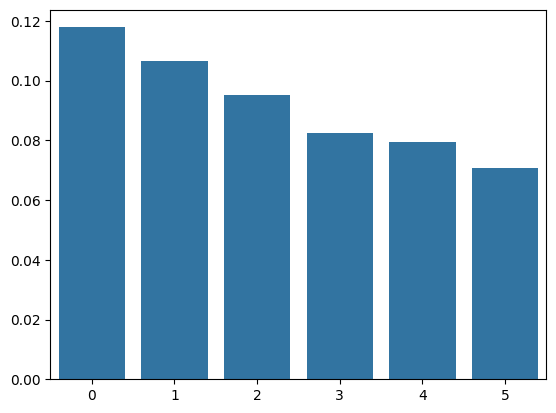

In [34]:
sns.barplot(x=range(len(pca.explained_variance_ratio_)),y=pca.explained_variance_ratio_)

In [35]:
component_names = [f'Component {i+1}' for i in range(pca.n_components_)]

component_loadings = pd.DataFrame(pca.components_, columns=df_X_scaled.columns, index=component_names)

component_loadings.T

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
Customer_care_calls,0.017219,0.050329,0.591243,0.005261,-0.160320,-0.029624
Customer_rating,0.004171,-0.000070,0.029612,0.005490,-0.024788,0.001858
Cost_of_the_Product,0.035371,0.020668,0.494801,-0.069680,-0.263452,0.019612
Prior_purchases,-0.004478,0.024834,0.404685,-0.025367,-0.092853,-0.023973
Product_importance,-0.013372,-0.010468,0.013778,0.007379,-0.033510,0.123849
Discount_offered,-0.026391,-0.025799,0.006074,0.196996,0.739684,0.044928
Weight_in_gms,0.006262,-0.010385,-0.485280,-0.144334,-0.526687,-0.018370
Female,-0.704706,0.039414,0.014253,-0.011448,-0.021149,0.007958
Male,0.704706,-0.039414,-0.014253,0.011448,0.021149,-0.007958
A,-0.003136,0.001864,-0.013487,-0.250248,0.120109,-0.511661


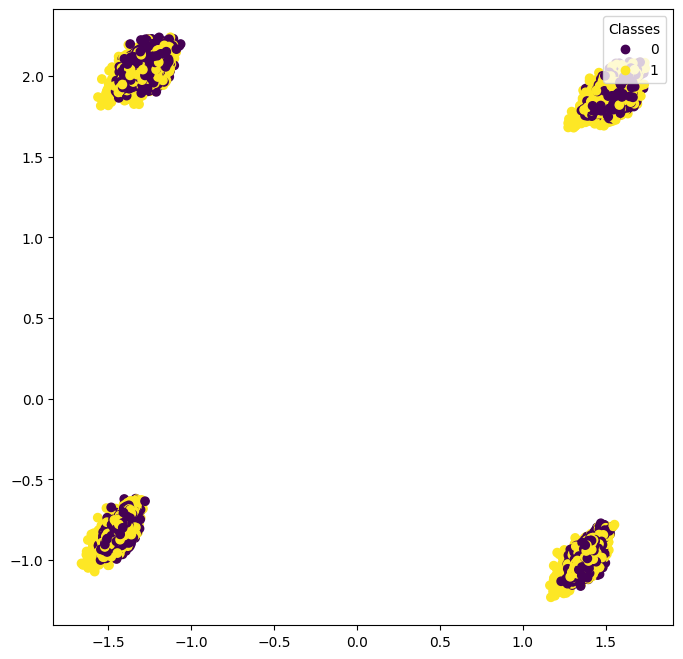

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, label='Class')
legend_labels = sorted(list(set(y)))
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right', title='Classes')

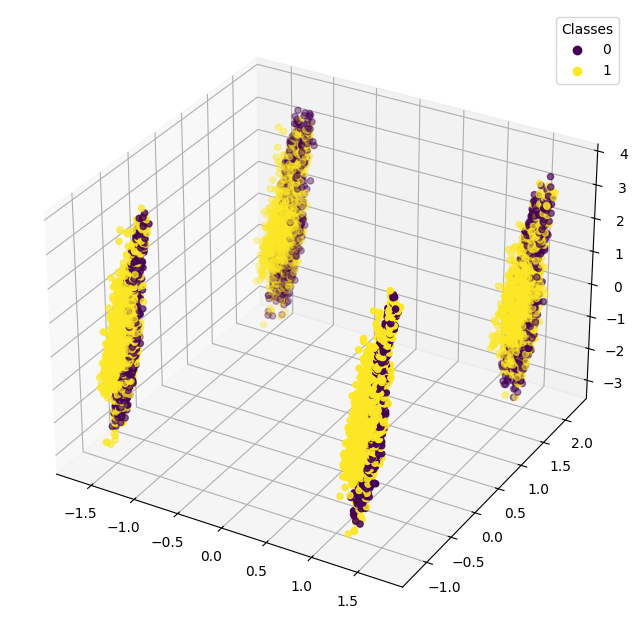

In [37]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, label='Class')
legend_labels = sorted(list(set(y)))
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right', title='Classes')

In [38]:
# Discretization

In [39]:
data['Cost_of_the_Product_discretized'] = pd.cut(data['Cost_of_the_Product'], bins=[0, 100, 200, 300, 400, 500], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
data['Weight_in_gms_discretized'] = pd.cut(data['Weight_in_gms'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['Very Light', 'Light', 'Moderate', 'Heavy', 'Very Heavy'])

In [40]:
data[['Cost_of_the_Product', 'Cost_of_the_Product_discretized', 'Weight_in_gms', 'Weight_in_gms_discretized']].head()

,Cost_of_the_Product,Cost_of_the_Product_discretized,Weight_in_gms,Weight_in_gms_discretized
0,177,Low,1233,Light
1,216,Medium,3088,Heavy
2,183,Low,3374,Heavy
3,176,Low,1177,Light
4,184,Low,2484,Moderate


# Modeling
-Classification:

In [41]:
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [42]:
data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,Female,Male,...,F,Flight,Road,Ship,Cost_of_the_Product_normalized,Weight_in_gms_normalized,Cost_of_the_Product_standardized,Weight_in_gms_standardized,Cost_of_the_Product_discretized,Weight_in_gms_discretized
0,4,2,177,3,1,44,1233,1,1,0,...,0,1,0,0,0.378505,0.033893,-0.690722,-1.468240,Low,Light
1,4,5,216,2,1,59,3088,1,0,1,...,1,1,0,0,0.560748,0.304894,0.120746,-0.333893,Medium,Heavy
2,2,2,183,4,1,48,3374,1,0,1,...,0,1,0,0,0.406542,0.346676,-0.565881,-0.159002,Low,Heavy
3,3,3,176,4,2,10,1177,1,0,1,...,0,1,0,0,0.373832,0.025712,-0.711529,-1.502484,Low,Light
4,2,2,184,3,2,46,2484,1,1,0,...,0,1,0,0,0.411215,0.216654,-0.545074,-0.703244,Low,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,2,1,1538,1,1,0,...,0,0,0,1,0.728972,0.078451,0.869792,-1.281730,Medium,Light
10995,4,1,232,5,2,6,1247,0,1,0,...,0,0,0,1,0.635514,0.035939,0.453655,-1.459679,Medium,Light
10996,5,4,242,5,1,4,1155,0,1,0,...,0,0,0,1,0.682243,0.022498,0.661724,-1.515937,Medium,Light
10997,5,2,223,6,2,2,1210,0,0,1,...,1,0,0,1,0.593458,0.030533,0.266394,-1.482304,Medium,Light


Grid search for LGBMClassifier ...
[LightGBM] [Info] Number of positive: 4216, number of negative: 2823
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 7039, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.598949 -> initscore=0.401087
[LightGBM] [Info] Start training from score 0.401087
[LightGBM] [Info] Number of positive: 4217, number of negative: 2822
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 7039, number of used featur

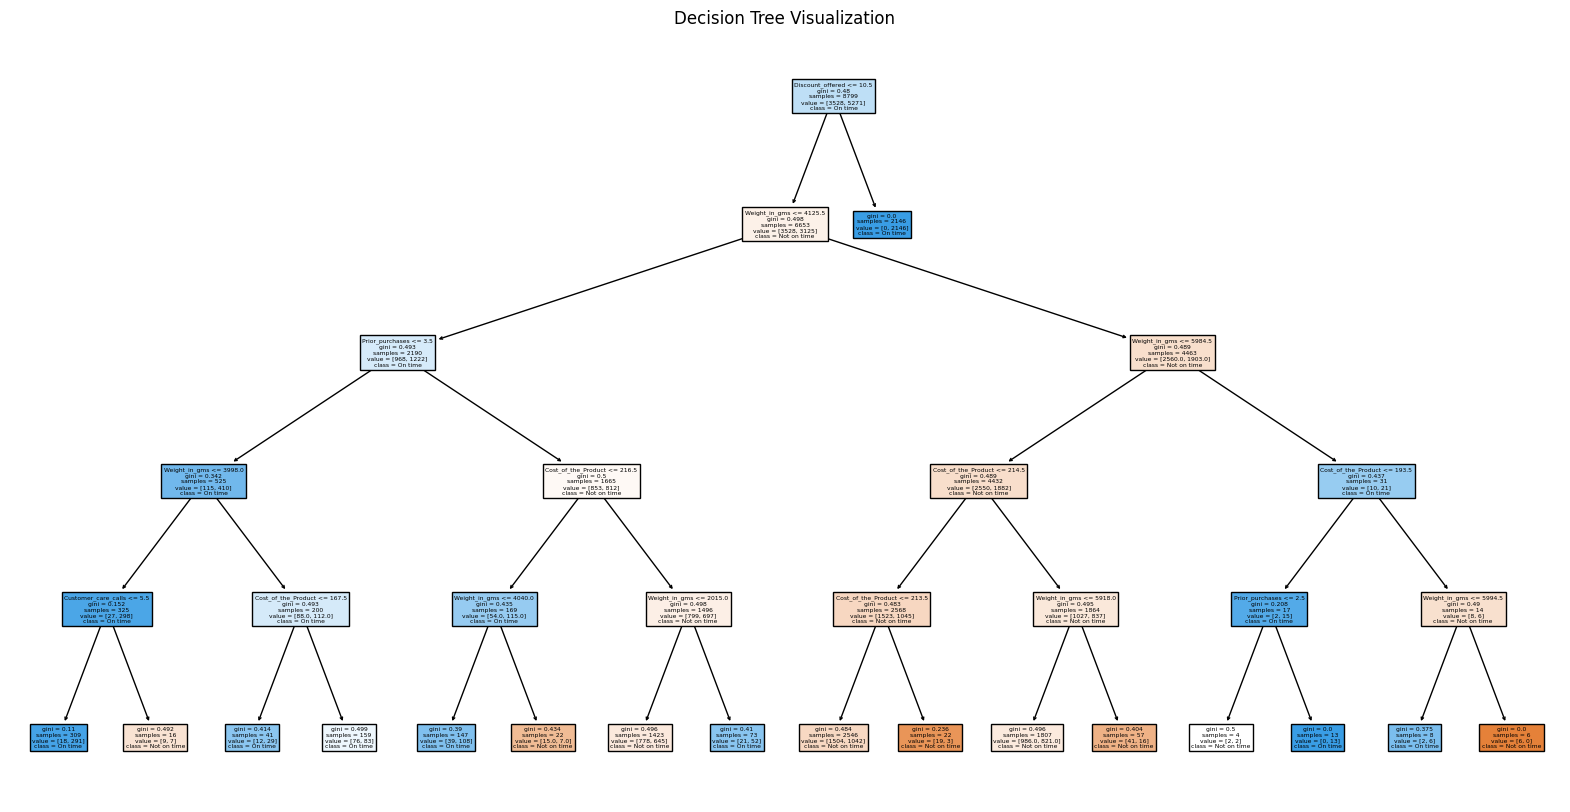

In [43]:
X = data.drop(columns=['Reached_on_time','Cost_of_the_Product_normalized','Weight_in_gms_normalized','Cost_of_the_Product_standardized','Weight_in_gms_standardized','Cost_of_the_Product_discretized','Weight_in_gms_discretized'])
y = data['Reached_on_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

param_grid = {
    'LGBMClassifier': {
        'boosting_type':['gbdt','dart','rf'],
        'n_estimators': [50, 75, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'GaussianNB': {},
    'RandomForestClassifier': {
        'n_estimators': [500, 600, 700],
        'max_depth': [5, 10, 15]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'weights': ['uniform', 'distance'],
    },
    'DecisionTreeClassifier': {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
}
models = {
    'LGBMClassifier':LGBMClassifier(),
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    print("Grid search for", model_name, "...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_accuracy': accuracy_score(y_test, grid_search.predict(X_test))
    }
    if model_name == 'DecisionTreeClassifier':
        best_model = grid_search.best_estimator_
        plt.figure(figsize=(20,10))
        plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Not on time', 'On time'])
        plt.title("Decision Tree Visualization")
        plt.show()

In [44]:
for model_name, result in results.items():
    print("Results for", model_name, ":")
    print("Best parameters:", result['best_params'])
    print("Best cross-validation score:", result['best_score'])
    print("Test accuracy:", result['test_accuracy'])
    print()

Results for LGBMClassifier :
Best parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'n_estimators': 200}
Best cross-validation score: 0.6723498630420176
Test accuracy: 0.6727272727272727

Results for LogisticRegression :
Best parameters: {'C': 10, 'solver': 'liblinear'}
Best cross-validation score: 0.638141506020983
Test accuracy: 0.6427272727272727

Results for GaussianNB :
Best parameters: {}
Best cross-validation score: 0.652461367512533
Test accuracy: 0.644090909090909

Results for RandomForestClassifier :
Best parameters: {'max_depth': 5, 'n_estimators': 700}
Best cross-validation score: 0.6758732363429635
Test accuracy: 0.6790909090909091

Results for KNeighborsClassifier :
Best parameters: {'n_neighbors': 80, 'weights': 'uniform'}
Best cross-validation score: 0.6771236239598947
Test accuracy: 0.6786363636363636

Results for DecisionTreeClassifier :
Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.684054925

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error,mean_absolute_percentage_error

X = data.drop(columns=['Cost_of_the_Product','Cost_of_the_Product_normalized','Weight_in_gms_normalized','Cost_of_the_Product_standardized','Weight_in_gms_standardized','Cost_of_the_Product_discretized','Weight_in_gms_discretized'])
y = data['Cost_of_the_Product']

params={'n_neighbors':[10,20,30,40,50,60,70,80,90,100],
            'weights':['uniform','distance'],
           }
k_reg=KNeighborsRegressor()
grid_search=GridSearchCV(estimator=k_reg,param_grid=params,cv=5,scoring=['neg_root_mean_squared_error','neg_mean_absolute_percentage_error'],refit='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:",grid_search.best_params_)
print("Best cross-validation score:",grid_search.best_score_)
print("RMSE:",root_mean_squared_error(y_test,grid_search.predict(X_test)))
print("MAPE:",mean_absolute_percentage_error(y_test,grid_search.predict(X_test)))

Best parameters: {'n_neighbors': 90, 'weights': 'uniform'}
Best cross-validation score: -0.42515127015734155
RMSE: 0.4283865535724784
MAPE: 835918130835824.0


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [47]:
pipeline = Pipeline([('scaler', StandardScaler()),('regressor', LinearRegression())  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [48]:
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("MAPE:", mape)
print("RMSE:", rmse)

MAPE: 910350455730448.5
RMSE: 0.4471967653495823


# Bagging and Boosting

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

bag_clf=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,min_samples_leaf=4,min_samples_split=2),random_state=42)
ada_clf=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,min_samples_leaf=4,min_samples_split=2),random_state=42)

bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print("Accuracy of Bagging:",accuracy_score(y_test,y_pred))
ada_clf=AdaBoostClassifier(estimator=DecisionTreeClassifier())

ada_clf.fit(X_train,y_train)
y_pred=ada_clf.predict(X_test)
print("Accuracy of Ada Boosting:",accuracy_score(y_test,y_pred))

Accuracy of Bagging: 0.6809090909090909
Accuracy of Ada Boosting: 0.6372727272727273


# CLUSTERING

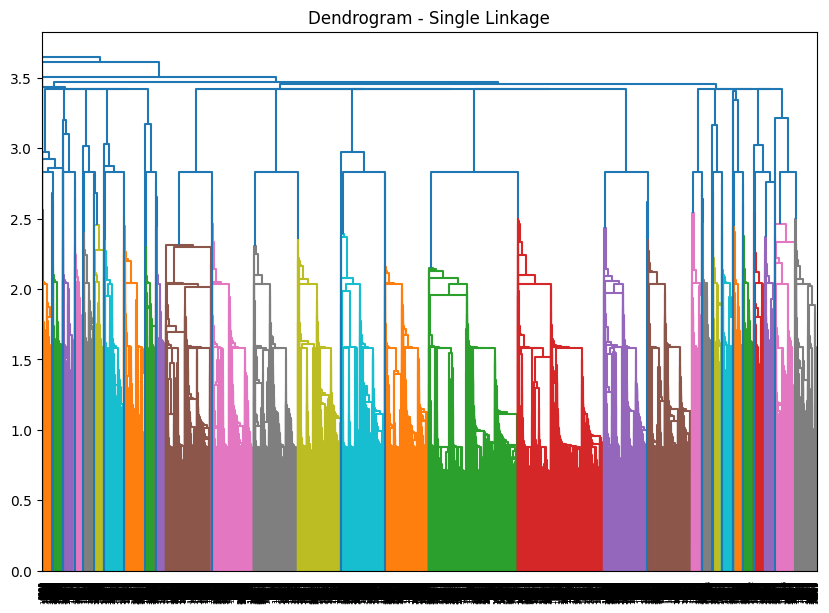

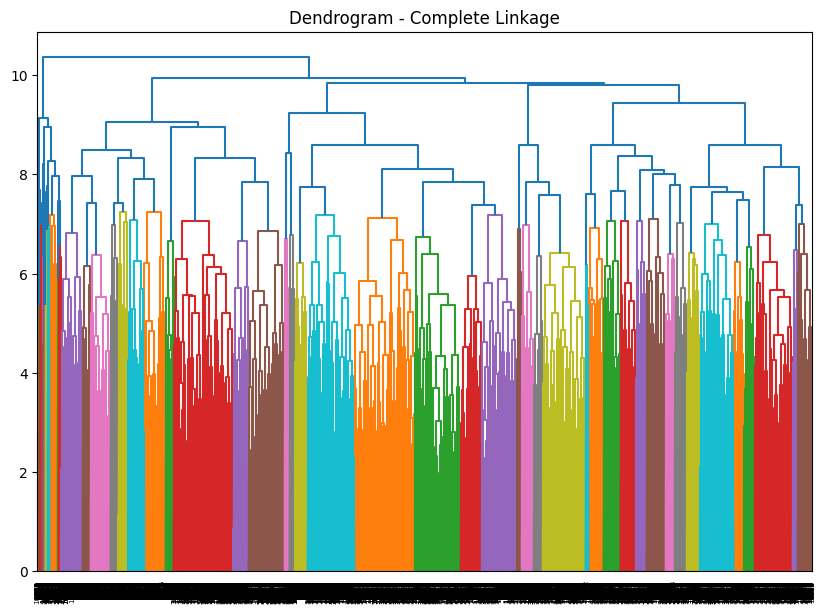

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# One
linked_single = linkage(data_scaled, method='single')
plt.figure(figsize=(10, 7))
dendrogram(linked_single)
plt.title('Dendrogram - Single Linkage')
plt.show()

# Complete
linked_complete = linkage(data_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked_complete)
plt.title('Dendrogram - Complete Linkage')
plt.show()

Cluster sizes: {-1: 10459, 0: 6, 1: 6, 2: 9, 3: 6, 4: 5, 5: 8, 6: 6, 7: 6, 8: 9, 9: 5, 10: 10, 11: 6, 12: 5, 13: 6, 14: 7, 15: 7, 16: 6, 17: 7, 18: 9, 19: 9, 20: 5, 21: 6, 22: 5, 23: 5, 24: 7, 25: 11, 26: 7, 27: 5, 28: 5, 29: 6, 30: 5, 31: 6, 32: 9, 33: 5, 34: 5, 35: 5, 36: 6, 37: 7, 38: 5, 39: 5, 40: 5, 41: 7, 42: 5, 43: 5, 44: 5, 45: 5, 46: 5, 47: 7, 48: 5, 49: 9, 50: 6, 51: 5, 52: 5, 53: 5, 54: 6, 55: 5, 56: 6, 57: 5, 58: 5, 59: 5, 60: 6, 61: 5, 62: 5, 63: 6, 64: 5, 65: 5, 66: 6, 67: 5, 68: 5, 69: 5, 70: 6, 71: 5, 72: 5, 73: 7, 74: 5, 75: 5, 76: 5, 77: 6, 78: 6, 79: 5, 80: 5, 81: 6, 82: 6, 83: 5, 84: 5, 85: 6, 86: 5, 87: 5, 88: 5, 89: 5, 90: 5, 91: 5}


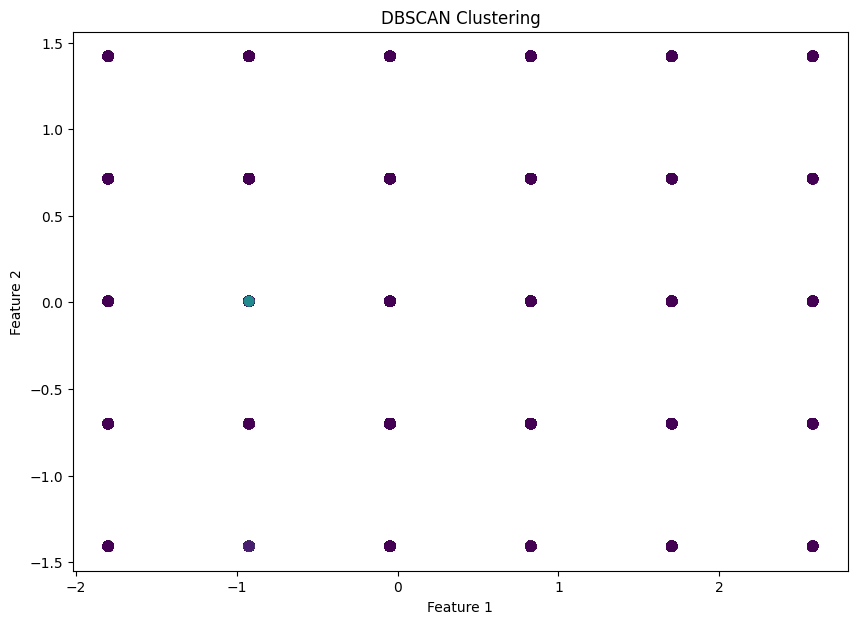

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# cluster sizes
unique, counts = np.unique(clusters, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)

plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Cluster sizes: {0: 5454, 1: 5545}


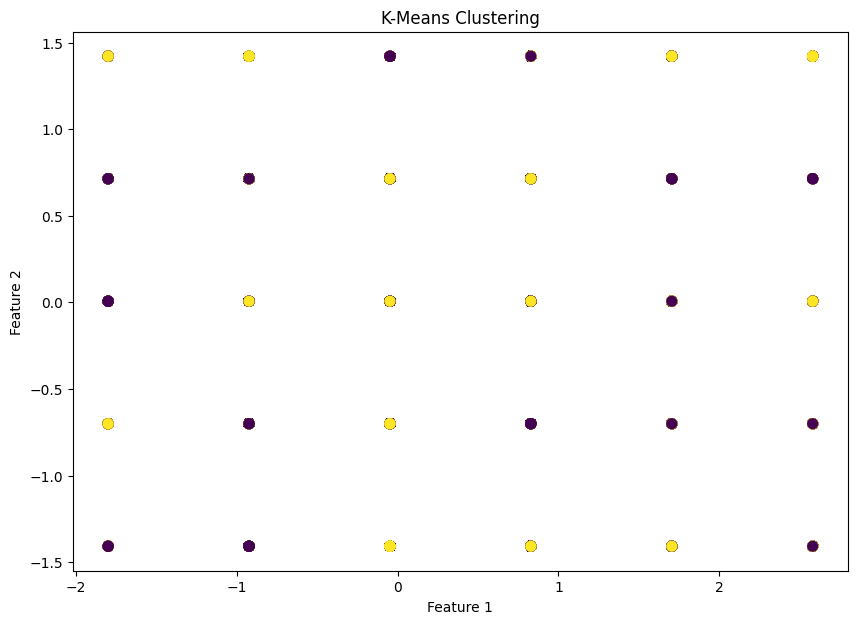

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

kmeans=KMeans(n_clusters=2,random_state=42)

clusters = kmeans.fit_predict(data_scaled)

# cluster sizes
unique, counts = np.unique(clusters, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)

plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [123]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

data = pd.read_csv("Train new.csv")

transactions = data.drop(columns=['Customer_rating']).apply(lambda row: [str(item) for item in row if str(item) not in ['M', 'F']], axis=1)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

print("Association Rules:")
print(rules[['antecedents', 'consequents', 'confidence']])


Association Rules:
  antecedents consequents  confidence
0         (3)         (1)    0.654076
1         (4)         (1)    0.605425
2         (1)      (Ship)    0.680258
3      (Ship)         (1)    0.637229
4       (low)         (1)    0.629413
5         (3)      (Ship)    0.679580
6         (4)      (Ship)    0.677999
7       (low)      (Ship)    0.680008
